In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aravindh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
#import the dataset
filepath = 'imdb_master.csv'
dataset = pd.read_csv(filepath, encoding = "ISO-8859-1")

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100000 non-null  int64 
 1   type        100000 non-null  object
 2   review      100000 non-null  object
 3   label       100000 non-null  object
 4   file        100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [21]:
dataset.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [22]:
dataset.columns

Index(['Unnamed: 0', 'type', 'review', 'label', 'file'], dtype='object')

In [ ]:
dataset_unsup = dataset[dataset['label'] == "unsup"]
dataset_fair = dataset.drop(dataset_unsup.index, axi)

In [23]:
test = dataset[ dataset['type'] == "test" ]

In [24]:
df_train = dataset[ dataset['type'] == "train"]
df_train_unsup = df_train[df_train['label'] == "unsup"]
train = df_train.drop(df_train_unsup.index, axis=0)

In [25]:
df_train

,Unnamed: 0,type,review,label,file
25000,25000,train,Story of a man who has unnatural feelings for ...,neg,0_3.txt
25001,25001,train,Airport '77 starts as a brand new luxury 747 p...,neg,10000_4.txt
25002,25002,train,This film lacked something I couldn't put my f...,neg,10001_4.txt
25003,25003,train,"Sorry everyone,,, I know this is supposed to b...",neg,10002_1.txt
25004,25004,train,When I was little my parents took me along to ...,neg,10003_1.txt
...,...,...,...,...,...
99995,99995,train,"Delightfully awful! Made by David Giancola, a ...",unsup,9998_0.txt
99996,99996,train,"Watching Time Chasers, it obvious that it was ...",unsup,9999_0.txt
99997,99997,train,At the beginning we can see members of Troma t...,unsup,999_0.txt
99998,99998,train,"The movie was incredible, ever since I saw it ...",unsup,99_0.txt


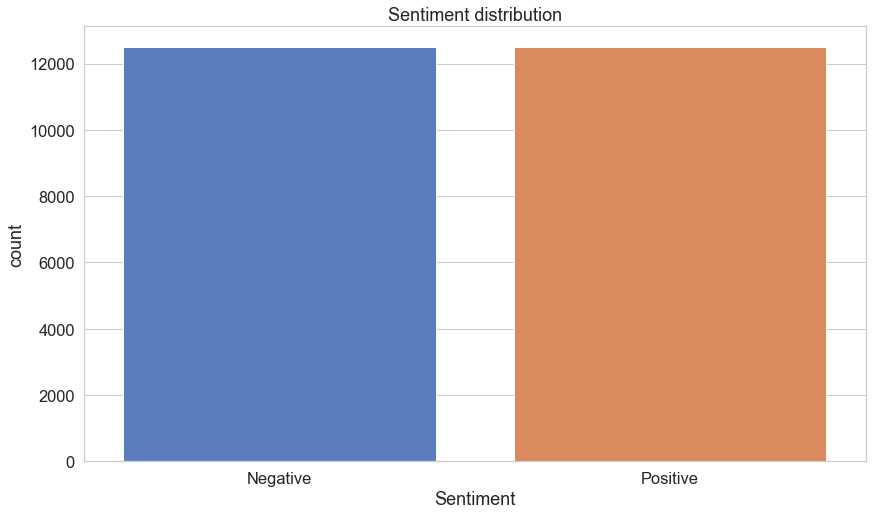

In [29]:
#ploting the share of positive and negative data in trainset
f = sns.countplot(x='label', data=train)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("Sentiment");